In [60]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 설명 및 목표

아래 데이터는 앞으로 제가 논문에 쓸 "대화형 AI를 활용한 감정 기반 피로도 분석 및 실시간 감지 연구"에 해당되는 데이터중 일부분 이며, 2만개의 V-A평가를 한 특정 취약 부분(V낮고 A가 낮은) 정신 상담 한국어 문장 데이터 입니다.

현재 일관성있는 라벨링을 목표를 두고 만들고 있는 데이터 셋임으로 정확한 평가와 예측은 예상되지는 않지만 감정을 분류할 수 있는지 모델이 학습할 수 있는지를 목표를 두고 레포트를 써봅니다.

150개의 감정을 emotion 컬럼에
우울,지루 : 1
불안,혼란 : 2
무기력,절망 : 3
분노,화 : 4
로 임의로 나눠 각 V-A평가에 따른 감정 분류에 대한 레포트 이며,
앞으로의 계획은 한국어 대화 문장의 벡터를 더하여 V-A평가 및 피로도를 예측하는 논문을 쓰고자 합니다.



In [61]:
import pandas as pd
df_VA = pd.read_excel('/content/drive/MyDrive/기계학습/정신 상담 대화 데이터 셋 - 챗 gpt - VA 평가.xlsx')
df_VA

,대화 데이터,Valence,Arousal,강한 긍정,긍정,중립,부정,강한 부정,강한 흥분도,중간 흥분도,없음,약한 흥분도,매우약한 흥분,Valence.1,Arousal.1,emotion
0,우울해,-0.8,-0.5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,-0.5,-1.0,1.0
1,너무 우울해,-0.9,-0.6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,-0.5,-1.0,1.0
2,우울해죽겠어,-1.0,-0.7,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,-1.0,-1.0,1.0
3,기분이 우울해,-0.8,-0.4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,-0.5,-1.0,1.0
4,우울모드임,-0.7,-0.3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,-0.5,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21994,불안함에 항상 시달리니까 잠도 못잤어요.,-0.7,0.7,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,-1.0,0.5,2.0
21995,불안하고 초조해서 잠이 안 와.,-0.7,0.7,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,-1.0,0.5,2.0
21996,너무 불안하니까 밤만 되면 잠이 안 오고 너무 초조해.,-0.7,0.7,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,-1.0,0.5,2.0
21997,불안해서 그런지 요즘 잠도 잘 안 와서 너무 힘들어요.,-0.7,0.7,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,-1.0,0.5,2.0


In [62]:
df_VA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21999 entries, 0 to 21998
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대화 데이터     21998 non-null  object 
 1   Valence    21998 non-null  float64
 2   Arousal    21998 non-null  float64
 3   강한 긍정      1 non-null      float64
 4   긍정         2 non-null      float64
 5   중립         6 non-null      float64
 6   부정         9512 non-null   float64
 7   강한 부정      12453 non-null  float64
 8   강한 흥분도     700 non-null    float64
 9   중간 흥분도     5282 non-null   float64
 10  없음         32 non-null     float64
 11  약한 흥분도     6215 non-null   float64
 12  매우약한 흥분    9748 non-null   float64
 13  Valence.1  21999 non-null  float64
 14  Arousal.1  21999 non-null  float64
 15  emotion    21998 non-null  float64
dtypes: float64(15), object(1)
memory usage: 2.7+ MB


In [63]:
df_VA.describe()

,Valence,Arousal,강한 긍정,긍정,중립,부정,강한 부정,강한 흥분도,중간 흥분도,없음,약한 흥분도,매우약한 흥분,Valence.1,Arousal.1,emotion
count,21998.000000,21998.000000,1.0,2.0,6.0,9512.0,12453.0,700.0,5282.0,32.0,6215.0,9748.000000,21999.000000,21999.000000,21998.000000
mean,-0.605944,-0.202402,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.001026,-0.782172,-0.432951,2.260024
std,0.172101,0.446220,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101284,0.249890,0.650924,0.988332
min,-1.000000,-0.900000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,-1.000000,-11.000000,1.000000
25%,-0.800000,-0.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,-1.000000,-1.000000,1.000000
50%,-0.600000,-0.300000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,-1.000000,-0.500000,2.000000
75%,-0.500000,-0.200000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,-0.500000,0.500000,3.000000
max,0.800000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.000000,1.000000,1.500000,4.000000


#전처리

## 컬럼 수정

In [64]:
# 데이터 프레임 복사
new_df = df_VA.copy()

# 컬럼 제거
new_df = new_df.drop(['강한 긍정','긍정', '중립', '부정', '강한 부정', '강한 흥분도', '중간 흥분도', '없음',
       '약한 흥분도', '매우약한 흥분'],axis=1)

# 컬럼 변경
new_df.rename(columns={'Valence':'Gpt_V'}, inplace=True)
new_df.rename(columns={'Arousal':'Gpt_A'}, inplace=True)
new_df.rename(columns={'Valence.1':'My_V'}, inplace=True)
new_df.rename(columns={'Arousal.1':'My_A'}, inplace=True)
new_df.rename(columns={'대화 데이터 ':'대화 데이터'}, inplace=True)
new_df.rename(columns={'emotion':'Emotion'}, inplace=True)

new_df.head()

,대화 데이터,Gpt_V,Gpt_A,My_V,My_A,Emotion
0,우울해,-0.8,-0.5,-0.5,-1.0,1.0
1,너무 우울해,-0.9,-0.6,-0.5,-1.0,1.0
2,우울해죽겠어,-1.0,-0.7,-1.0,-1.0,1.0
3,기분이 우울해,-0.8,-0.4,-0.5,-1.0,1.0
4,우울모드임,-0.7,-0.3,-0.5,-1.0,1.0


In [65]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21999 entries, 0 to 21998
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대화 데이터   21998 non-null  object 
 1   Gpt_V    21998 non-null  float64
 2   Gpt_A    21998 non-null  float64
 3   My_V     21999 non-null  float64
 4   My_A     21999 non-null  float64
 5   Emotion  21998 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.0+ MB


## 결측치 확인 및 제거

In [66]:
#결측치 확인 및 제거
new_df.isnull().sum()

,0
대화 데이터,1
Gpt_V,1
Gpt_A,1
My_V,0
My_A,0
Emotion,1


In [67]:
df1 = new_df[new_df['대화 데이터'].notnull()]
df1 = df1[new_df['Emotion'].notnull()]
df1.isnull().sum()

<ipython-input-67-0f671ac2931b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[new_df['Emotion'].notnull()]


,0
대화 데이터,0
Gpt_V,0
Gpt_A,0
My_V,0
My_A,0
Emotion,0


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21997 entries, 0 to 21997
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대화 데이터   21997 non-null  object 
 1   Gpt_V    21997 non-null  float64
 2   Gpt_A    21997 non-null  float64
 3   My_V     21997 non-null  float64
 4   My_A     21997 non-null  float64
 5   Emotion  21997 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.2+ MB


## 컬럼 범위 설정

In [69]:
df1 = df1[(df1['My_A'] >= -1) & (df1['My_A'] <= 1)]
df1 = df1[(df1['My_V'] >= -1) & (df1['My_V'] <= 1)]
df1 = df1[(df1['Emotion'] >= 1) & (df1['Emotion'] <= 4)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21994 entries, 0 to 21997
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대화 데이터   21994 non-null  object 
 1   Gpt_V    21994 non-null  float64
 2   Gpt_A    21994 non-null  float64
 3   My_V     21994 non-null  float64
 4   My_A     21994 non-null  float64
 5   Emotion  21994 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.2+ MB


## 이상치 확인

My_A 컬럼


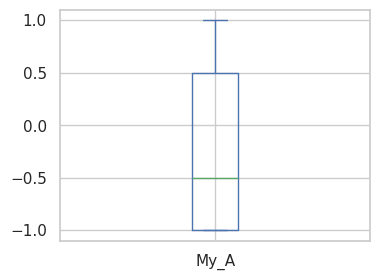

--------------------------------------------------------------------------------


In [70]:
### Boxplot을 이용한 이상치 유무 확인
# 필요한 라이브러리
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))

# My_A 컬럼
print("My_A 컬럼")
df1.My_A.plot(kind='box')
plt.show()
print('-'*80)

My_V 컬럼


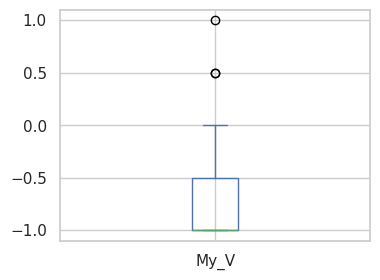

--------------------------------------------------------------------------------


In [71]:
### Boxplot을 이용한 이상치 유무 확인
# 필요한 라이브러리
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))

# My_V 컬럼
print("My_V 컬럼")
df1.My_V.plot(kind='box')
plt.show()
print('-'*80)

Emotion 컬럼


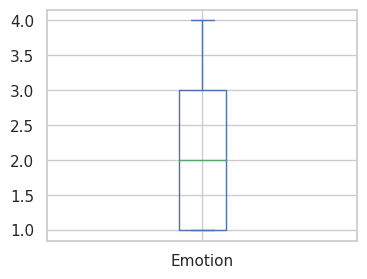

--------------------------------------------------------------------------------


In [72]:
### Boxplot을 이용한 이상치 유무 확인
# 필요한 라이브러리
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))

# Emotion 컬럼
print("Emotion 컬럼")
df1.Emotion.plot(kind='box')
plt.show()
print('-'*80)

## 컬럼 추가

In [73]:
df1['V_diff'] = abs(df1['My_V'] - df1['Gpt_V'])
df1['A_diff'] = abs(df1['My_A'] - df1['Gpt_A'])
df1.head()

,대화 데이터,Gpt_V,Gpt_A,My_V,My_A,Emotion,V_diff,A_diff
0,우울해,-0.8,-0.5,-0.5,-1.0,1.0,0.3,0.5
1,너무 우울해,-0.9,-0.6,-0.5,-1.0,1.0,0.4,0.4
2,우울해죽겠어,-1.0,-0.7,-1.0,-1.0,1.0,0.0,0.3
3,기분이 우울해,-0.8,-0.4,-0.5,-1.0,1.0,0.3,0.6
4,우울모드임,-0.7,-0.3,-0.5,-1.0,1.0,0.2,0.7


## 오차 설정

In [74]:
# 오차 설정
diff = 0.5

# 오차가 0.5보다 큰 데이터 프레임
df_error_over_0_5 = df1[(df1["V_diff"] > diff) | (df1["A_diff"] > diff)]
df_error_over_0_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8364 entries, 3 to 21986
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대화 데이터   8364 non-null   object 
 1   Gpt_V    8364 non-null   float64
 2   Gpt_A    8364 non-null   float64
 3   My_V     8364 non-null   float64
 4   My_A     8364 non-null   float64
 5   Emotion  8364 non-null   float64
 6   V_diff   8364 non-null   float64
 7   A_diff   8364 non-null   float64
dtypes: float64(7), object(1)
memory usage: 588.1+ KB


In [75]:
# 오차가 0.5보다 큰 데이터 프레임
df_error_0_5_or_less = df1[(df1["V_diff"] <= diff) | (df1["A_diff"] <= diff)]
df_error_0_5_or_less.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20616 entries, 0 to 21997
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대화 데이터   20616 non-null  object 
 1   Gpt_V    20616 non-null  float64
 2   Gpt_A    20616 non-null  float64
 3   My_V     20616 non-null  float64
 4   My_A     20616 non-null  float64
 5   Emotion  20616 non-null  float64
 6   V_diff   20616 non-null  float64
 7   A_diff   20616 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.4+ MB


## 가중 평균

In [76]:
# 가중 평균
my_weight = 0.5  # 내가 평가한 Valence에 부여할 가중치
gpt_weight = 0.5  # GPT 평가 Valence에 부여할 가중치

df_error_0_5_or_less['Weight_av_V'] = (
    df_error_0_5_or_less['My_V'] * my_weight + df_error_0_5_or_less['Gpt_V'] * gpt_weight
)
df_error_0_5_or_less['Weight_av_A'] = (
    df_error_0_5_or_less['My_A'] * my_weight + df_error_0_5_or_less['Gpt_A'] * gpt_weight
)

df_error_0_5_or_less.head()

<ipython-input-76-0ab76d048038>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error_0_5_or_less['Weight_av_V'] = (
<ipython-input-76-0ab76d048038>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error_0_5_or_less['Weight_av_A'] = (


,대화 데이터,Gpt_V,Gpt_A,My_V,My_A,Emotion,V_diff,A_diff,Weight_av_V,Weight_av_A
0,우울해,-0.8,-0.5,-0.5,-1.0,1.0,0.3,0.5,-0.65,-0.75
1,너무 우울해,-0.9,-0.6,-0.5,-1.0,1.0,0.4,0.4,-0.70,-0.80
2,우울해죽겠어,-1.0,-0.7,-1.0,-1.0,1.0,0.0,0.3,-1.00,-0.85
3,기분이 우울해,-0.8,-0.4,-0.5,-1.0,1.0,0.3,0.6,-0.65,-0.70
4,우울모드임,-0.7,-0.3,-0.5,-1.0,1.0,0.2,0.7,-0.60,-0.65


#시각화

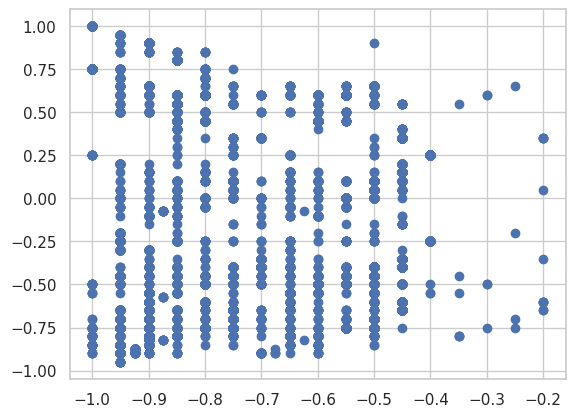

In [77]:
import matplotlib.pyplot as plt
x = df_error_0_5_or_less['Weight_av_V']
y = df_error_0_5_or_less['Weight_av_A']

plt.scatter(x, y)
plt.show()

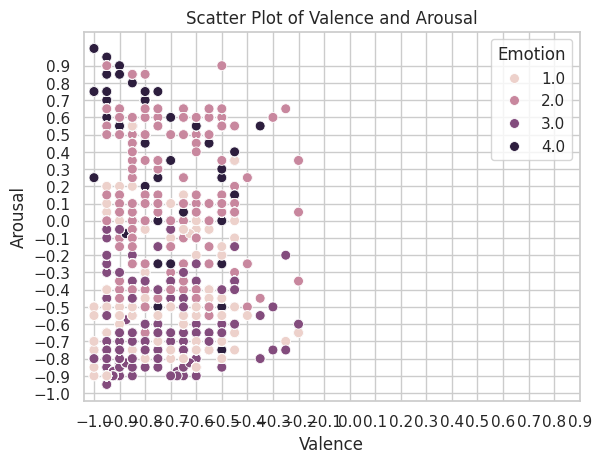

In [78]:
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

scatter = sns.scatterplot(data=df_error_0_5_or_less, x='Weight_av_V', y='Weight_av_A',
                          s=50 , hue='Emotion', hue_order=['우울', '불안', '절망', '분노'])

scatter.set_xlabel('Valence')
scatter.set_ylabel('Arousal')
scatter.set_title('Scatter Plot of Valence and Arousal')

scatter.set_xticks(np.arange(-1, 1, 0.1))
scatter.set_yticks(np.arange(-1, 1, 0.1))
plt.show()

## 평가

 V 모델(V-Model)은 감정 모델로서 James A. Russell의 1980년 논문에 따르면 감정을 VA로 나누었을 때 V자의 형태를 띈다고 하는데, 물론 위 오차를 변경하면 V모델과 근사한 시각화를 볼 수 있지만, 정신 상담 데이터셋은 다양한 감정이 혼합되어있으며, 주관적인 평가가 중요하다 생각해 오차를 0.5로 두었으며, 선형적 모델을 예측하기 보다 비선형적인 모델을 통해 감정을 분류를 하는 것이 논문의 방향성과 맞다 생각하여 설정했습니다.

*   시각화 평가

1.   화 분노의 영역은 V가 낮고 A가 큰 영역에 해당됩니다.
2.   혼란의 영역은 V가 낮고 A가 -0.5~0.5의 영역에 해당됩니다.
3.   우울의 영역은 V가 낮고 A가 0~-1의 영역에 해당됩니다.
4.   무기력 절망의 영역은 V가 낮고 A가 -0.5~-1의 영역에 해당됩니다.

 시각화를 했을 때 비선형적 패턴 데이터임을 확인 할 수 있으며, 이에 맞춘 클러스터링 이나 감정 분류 모델을 사용하여 모델을 학습 및 예측을 할 것.
->

 LightGBM은 데이터의 불균형 문제를 해결하고, 적은 연산 비용으로 높은 예측 성능을 제공함으로 모델을 선정



# LightGBM 모델 학습

## 데이터 프레임 확인

In [79]:
df_error_0_5_or_less.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20616 entries, 0 to 21997
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   대화 데이터       20616 non-null  object 
 1   Gpt_V        20616 non-null  float64
 2   Gpt_A        20616 non-null  float64
 3   My_V         20616 non-null  float64
 4   My_A         20616 non-null  float64
 5   Emotion      20616 non-null  float64
 6   V_diff       20616 non-null  float64
 7   A_diff       20616 non-null  float64
 8   Weight_av_V  20616 non-null  float64
 9   Weight_av_A  20616 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## 모델 학습 및 예측

In [80]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

##### 데이터 분리 #####
X = df_error_0_5_or_less[['Weight_av_V', 'Weight_av_A']]
Y = df_error_0_5_or_less['Emotion']

# 데이터 분리 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=y)

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# LightGBM 하이퍼파라미터 설정
params = {
    'objective': 'multiclass',  # 다중 클래스 분류
    'num_class': len(y.unique()),  # 클래스 개수
    'metric': 'multi_logloss',    # 평가 지표
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': -1
}

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [82]:
# 모델 학습
model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# 테스트 데이터 예측
y_pred = model.predict(X_test)
y_pred_labels = [list(pred).index(max(pred)) for pred in y_pred]

# 결과 평가
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.380542
Accuracy: 0.8435984481086324

Classification Report:
               precision    recall  f1-score   support

         1.0       0.80      0.78      0.79      1314
         2.0       0.91      0.83      0.86       947
         3.0       0.82      0.91      0.87      1471
         4.0       0.95      0.84      0.89       392

    accuracy                           0.84      4124
   macro avg       0.87      0.84      0.85      4124
weighted avg       0.85      0.84      0.84      4124



## 평가

전채적으로 84%의 예측으로 정확도를 가지고 있음
정밀도 0.87
우울의 예측이 recall이 낮음으로 데이터 증강및 튜닝이 필요하며, 라벨링을 다시 해야할 가능성이 보임
화 분노의 데이터가 적음으로 추가 데이터나 증강이 필요

데이터 증강과 재 라벨링은 시간이 오래 걸리니 보다 최적의 하이퍼파라미터 조합을 찾아 봄 -> Random Search 기반 최적화

#Random Search 기반 LightGBM 최적화

##모델 학습 및 예측

In [88]:
import random
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 데이터 준비
X = df_error_0_5_or_less[['Weight_av_V', 'Weight_av_A']]
y = df_error_0_5_or_less['Emotion']-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 하이퍼파라미터 범위 정의
param_space = {
    'learning_rate': (0.01, 0.1),  # Log-uniform으로 샘플링
    'num_leaves': (10, 100),
    'max_depth': (-1, 15),
    'min_data_in_leaf': (1, 50),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'lambda_l1': (0.0, 10.0),
    'lambda_l2': (0.0, 10.0),
}

# Random Search
n_iter = 30  # Random Search 반복 횟수
best_score = -float('inf')
best_params = None

for i in range(n_iter):
    # 무작위로 하이퍼파라미터 샘플링
    params = {
        'objective': 'multiclass',
        'num_class': len(y.unique()),
        'metric': 'multi_logloss',
        'learning_rate': random.uniform(*param_space['learning_rate']),
        'num_leaves': random.randint(*param_space['num_leaves']),
        'max_depth': random.randint(*param_space['max_depth']),
        'min_data_in_leaf': random.randint(*param_space['min_data_in_leaf']),
        'subsample': random.uniform(*param_space['subsample']),
        'colsample_bytree': random.uniform(*param_space['colsample_bytree']),
        'lambda_l1': random.uniform(*param_space['lambda_l1']),
        'lambda_l2': random.uniform(*param_space['lambda_l2']),
    }

    # 모델 학습
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    model = lgb.train(
        params,
        train_data,
        valid_sets=[valid_data],
        callbacks=[lgb.early_stopping(stopping_rounds=10)])

    # 예측 및 평가
    preds = model.predict(X_test)
    pred_labels = [list(p).index(max(p)) for p in preds]
    score = f1_score(y_test, pred_labels, average='weighted')

    # 최적의 파라미터 갱신
    if score > best_score:
        best_score = score
        best_params = params

print("Best F1 Score:", best_score)
print("Best Parameters:", best_params)


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.408059
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.689193
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.698177
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.68186
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.381191
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.433092
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is

In [91]:
# 최적 파라미터로 최종 학습
best_params = {
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss',
    'learning_rate': 0.06833923204258675,
    'num_leaves': 46,
    'max_depth': 10,
    'min_data_in_leaf': 6,
    'subsample': 0.7700481855550232,
    'colsample_bytree': 0.9171854639384582,
    'lambda_l1': 0.421943088310337,
    'lambda_l2': 9.546576542953169
}

# LightGBM 데이터셋
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 최종 모델 학습
final_model = lgb.train(best_params, train_data, valid_sets=[test_data], callbacks=[lgb.early_stopping(stopping_rounds=10)])

# 테스트 데이터 예측
final_preds = final_model.predict(X_test)
final_pred_labels = [list(p).index(max(p)) for p in final_preds]

# 최종 평가
from sklearn.metrics import classification_report, confusion_matrix

print("Final Classification Report:\n")
print(classification_report(y_test, final_pred_labels))

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.374692
Final Classification Report:

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      1305
         1.0       0.93      0.83      0.88       959
         2.0       0.82      0.91      0.86      1481
         3.0       0.96      0.87      0.91       379

    accuracy                           0.85      4124
   macro avg       0.88      0.85      0.86      4124
weighted avg       0.85      0.85      0.85      4124

Confusion Matrix:

[[1021   20  258    6]
 [ 138  796   22    3]
 [ 122    8 1347    4]
 [   4   33   13  329]]


## 클래스 혼동 여부 확인 및 시각화

In [ ]:
# 클래스간 혼동 여부 확인
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, final_pred_labels))

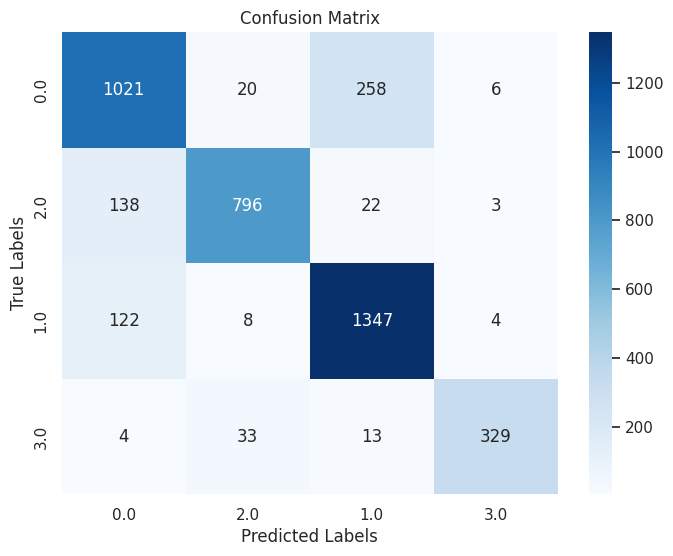

In [93]:
# confusion_matrix를 통한 시각화
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 생성
cm = confusion_matrix(y_test, final_pred_labels)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##평가

시각화를 했을 때 대각선의 색이 진해 예측이 잘되었음을 알 수 있지만,
분노 화의 영역이 적은 점 및 몇개의 일부 샘플이 잘못 예측되어 혼동이되었습니다.
혼동 되는 이유로는 아마 라벨링이나 문장안에 있는 감정을 판단할 때 영역을 나누기 어려운 이유 등 이 있다고 생각합니다.
예) 우울하지만 기뻐, 화가 나지만 결국엔 우울 했어 등..
이를 더 모델이 잘 학습하기 위해서는 대화 데이터 내의 문맥,시간,감정선을 이해하고 벡터화한 데이터나 데이터셋에 명확한 라벨링, 다른 VA 영역을 더해가며, 위에 사용한 LightGbm 이외에 다른 모델을 사용하는 방법등 이 있다.

#느낀점

2만개의 데이터를 라벨링 하고 데이터셋을 만들어 모델 평가를 한 것이라 아직 부족하고 레포트의 완성도가 떨어지지만 이를 통해 앞으로 논문 쓰는 것에 대한 방향성과 목표를 확립할 수 있었습니다. 시간이 부족해 많은 내용을 더 담고 싶지만 그렇지 못하여 아쉽습니다만 수업을 통해 배운것을 바탕으로 논문 준비를 잘 해보겠습니다.